<strong style="margin-left:42%;font-size:30px;font-weight:600;"><h1>UAS</h1></strong>
<p style="margin-left:33.3333%;font-size:20px;font-weight:600;color:blue;">GRAFIKA KOMPUTER</p>
<p style="margin-left:30%;font-size:20px;font-weight:600;">Maftuh Mashuri (11160940000076)</p>

## a. Melakukan eksplorasi data, yaitu melihat nilai rata-rata dan modus pixel dari setiap gambar dalam setiap kategori.

# import basic modul

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob, os, random

# import sklearn modul

In [2]:
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn import svm, metrics
from sklearn.metrics import accuracy_score

### - fungsi untuk menampilkan gambar

In [3]:
def bgr2rgb(img):
    return cv.cvtColor(img, cv.COLOR_BGR2RGB)
def rgb2bgr(img):
    return cv.cvtColor(img, cv.COLOR_RGB2BGR)
def bgr2gray(img):
    return cv.cvtColor(img, cv.COLOR_BGR2GRAY)
def rgb2gray(img):
    return cv.cvtColor(img, cv.COLOR_RGB2GRAY)

#### untuk menampilkan satu gambar ####
def show_image(image, image_name = 'Image', bgr_to_rgb = False, reshape = []):
    img = image
    if len(reshape) != 0:
        img = img.reshape(tuple(reshape))
    if bgr_to_rgb:
        img = bgr2rgb(img)
    plt.imshow(img)
    plt.title(image_name)
    plt.show()

#### untuk menampilkan banyak gambar berupa list atau dictionary ####
def show_images(data, image_name = 'Image', bgr_to_rgb = False, sample = 0, reshape = []):

    index = sample

    if type(data) is dict:
        for key in data:
            if sample !=0:
                index = random.randint(0, len(data[key])-1)
            show_image(data[key][index], key, bgr_to_rgb, reshape)

    elif type(data) is list:
        if sample !=0:
            index = random.randint(0, len(data)-1)

        data = data[index]
        show_image(data, image_name, bgr_to_rgb, reshape)

    else:
        return False

### - fungsi untuk merubah ukuran gambar

In [4]:
def resize_images(data, dimension = [200,200]):
    dimension = tuple(dimension)

    if type(data) is dict:
        result = {}
        for key in data:
            
            result[key] = []
            for img in data[key]:
                img = cv.resize(img, dimension)
                result[key].append(img)

    elif type(data) is list:
        result = []
        for img in data:
            img = cv.resize(img, dimension)
            result.append(img)

    elif type(data) is np.ndarray:
        result = cv.resize(data, dimension)
    else:
        return False

    return result

### - fungsi untuk merubah bentuk gambar

In [5]:
def reshape_1d(img, dimension, to_gray = False):
    img = resize_images(img, dimension)
    if to_gray:
        img = rgb2gray(img)
    return img.reshape(-1)

def reshape_images_1d(data, dimension, to_gray = False, merge_class_dict = False):

    if type(data) is dict:
        for key in data:
            img = reshape_1d(data[key][0], dimension, to_gray)
            result = np.array([img.flatten()])
            break

        for key in data:
            for img in data[key]:
                img = reshape_1d(img, dimension, to_gray)
                result = np.concatenate((result, [img.flatten()]), axis=0)
        result = np.delete(result, 0, 0)

    elif type(data) is list:
        img = reshape_1d(data[0], dimension, to_gray)
        result = np.array([img.flatten()])

        for img in data[1:]:
            img = reshape_1d(img, dimension, to_gray)
            result = np.concatenate((result, [img.flatten()]), axis=0)

    elif type(data) is np.ndarray:
        result = reshape_1d(data, dimension, to_gray)
    else:
        return False
    return result

### - load data gambar

In [6]:
data_dir = 'data'
class_dir_list = ['banjir', 'kebakaran']

images_data = {}
for class_dir in class_dir_list:

    images_data[class_dir] = []

    for image_name in glob.glob(os.path.join(data_dir, class_dir, '*.jpeg')):
        image = bgr2rgb(cv.imread(image_name))
        images_data[class_dir].append(image)

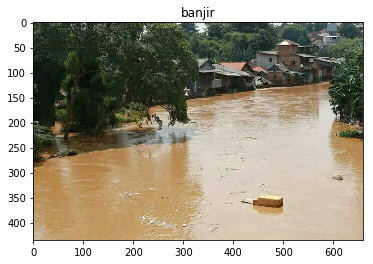

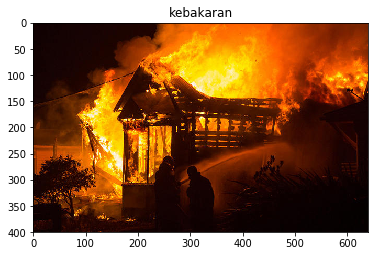

In [7]:
show_images(images_data, sample=True)

### - jumlah data masing-masing kategori

In [8]:
def count_images(data):
    if type(data) is dict:
        for key in data:
            n = len(data[key])
            print('Jumlah gambar', key, 'sebanyak', n, 'gambar')

    elif type(data) is list:
        n = len(data)
        print('Jumlah gambar sebanyak', gambar, 'gambar')

In [9]:
count_images(images_data)

Jumlah gambar banjir sebanyak 44 gambar
Jumlah gambar kebakaran sebanyak 44 gambar


### - fungsi image shape

In [10]:
def images_shape(images):
    shapes = []
    for img in images:
        shapes.append(img.shape)
    return shapes

### - menampilkan bentuk masing-masing gambar

In [11]:
data = {}
for images in images_data:
    data[images] = images_shape(images_data[images])

pd.DataFrame(data, index = ['image'+str(i) for i in range(len(images_data[images]))]).T

,image0,image1,image2,image3,image4,image5,image6,image7,image8,image9,...,image34,image35,image36,image37,image38,image39,image40,image41,image42,image43
banjir,"(366, 650, 3)","(562, 750, 3)","(665, 1000, 3)","(500, 750, 3)","(955, 1433, 3)","(768, 1024, 3)","(544, 970, 3)","(480, 640, 3)","(720, 1280, 3)","(500, 750, 3)",...,"(1067, 1600, 3)","(853, 640, 3)","(870, 1406, 3)","(960, 1440, 3)","(640, 960, 3)","(1283, 2527, 3)","(500, 750, 3)","(500, 750, 3)","(405, 720, 3)","(1688, 3000, 3)"
kebakaran,"(613, 1090, 3)","(683, 1024, 3)","(960, 1440, 3)","(365, 650, 3)","(720, 1280, 3)","(533, 800, 3)","(536, 1000, 3)","(768, 1024, 3)","(400, 800, 3)","(393, 700, 3)",...,"(720, 1280, 3)","(450, 800, 3)","(430, 822, 3)","(1366, 683, 3)","(515, 760, 3)","(498, 800, 3)","(450, 675, 3)","(336, 448, 3)","(393, 700, 3)","(500, 750, 3)"


### - fungsi image min/max

In [12]:
def images_min_max(images):
    min_max = []
    for img in images:
        min_max.append((img.min(), img.max()))
    return min_max

### - menampilkan minimum dan maximum pixel pada masing-masing gambar

In [13]:
print('min/max images')
for images in images_data:
    data[images] = images_shape(images_data[images])

pd.DataFrame(data, index = ['image'+str(i) for i in range(len(images_data[images]))]).T

min/max images


,image0,image1,image2,image3,image4,image5,image6,image7,image8,image9,...,image34,image35,image36,image37,image38,image39,image40,image41,image42,image43
banjir,"(366, 650, 3)","(562, 750, 3)","(665, 1000, 3)","(500, 750, 3)","(955, 1433, 3)","(768, 1024, 3)","(544, 970, 3)","(480, 640, 3)","(720, 1280, 3)","(500, 750, 3)",...,"(1067, 1600, 3)","(853, 640, 3)","(870, 1406, 3)","(960, 1440, 3)","(640, 960, 3)","(1283, 2527, 3)","(500, 750, 3)","(500, 750, 3)","(405, 720, 3)","(1688, 3000, 3)"
kebakaran,"(613, 1090, 3)","(683, 1024, 3)","(960, 1440, 3)","(365, 650, 3)","(720, 1280, 3)","(533, 800, 3)","(536, 1000, 3)","(768, 1024, 3)","(400, 800, 3)","(393, 700, 3)",...,"(720, 1280, 3)","(450, 800, 3)","(430, 822, 3)","(1366, 683, 3)","(515, 760, 3)","(498, 800, 3)","(450, 675, 3)","(336, 448, 3)","(393, 700, 3)","(500, 750, 3)"


### - fungsi image size

In [14]:
def images_size(images):
    sizes = []
    for img in images:
        sizes.append(img.size)
    return sizes

### - menampilkan ukuran masing-masing gambar

In [15]:
print('Size images')
for images in images_data:
    data[images] = images_size(images_data[images])

pd.DataFrame(data, index = ['image'+str(i) for i in range(len(images_data[images]))]).T

Size images


,image0,image1,image2,image3,image4,image5,image6,image7,image8,image9,...,image34,image35,image36,image37,image38,image39,image40,image41,image42,image43
banjir,713700,1264500,1995000,1125000,4105545,2359296,1583040,921600,2764800,1125000,...,5121600,1637760,3669660,4147200,1843200,9726423,1125000,1125000,874800,15192000
kebakaran,2004510,2098176,4147200,711750,2764800,1279200,1608000,2359296,960000,825300,...,2764800,1080000,1060380,2798934,1174200,1195200,911250,451584,825300,1125000


### - fungsi images mean

In [16]:
def images_mean(images):
    means = []
    for img in images:
        means.append(img.mean())
    return means

### - menampilkan rata-rata pixel masing-masing gambar

In [17]:
print('Mean images')
for images in images_data:
    data[images] = images_mean(images_data[images])

pd.DataFrame(data, index = ['image'+str(i) for i in range(len(images_data[images]))]).T

Mean images


,image0,image1,image2,image3,image4,image5,image6,image7,image8,image9,...,image34,image35,image36,image37,image38,image39,image40,image41,image42,image43
banjir,111.502687,101.790070,93.217333,123.873620,88.915539,141.335981,133.576583,164.348459,104.535732,102.762551,...,118.283704,113.693227,126.617984,67.923235,103.070118,149.866392,93.158812,110.423127,88.500784,118.905505
kebakaran,59.876358,67.218099,53.493390,55.015237,88.870063,92.774455,109.341309,38.279299,36.969418,100.174378,...,139.982787,94.072834,72.717182,49.864585,103.660019,87.560031,52.606242,92.018936,114.427545,119.760238


### - fungsi images modus

In [18]:
def images_modus(images):
    modus = []
    for img in images:
        img = np.array(img.flatten())
        counts = np.bincount(img)
        modus.append(np.argmax(counts))
    return modus

### - menampilkan pixel yang paling sering muncul pada masing-masing gambar

In [19]:
print('Modus images')
for images in images_data:
    data[images] = images_modus(images_data[images])

pd.DataFrame(data, index = ['image'+str(i) for i in range(len(images_data[images]))]).T

Modus images


,image0,image1,image2,image3,image4,image5,image6,image7,image8,image9,...,image34,image35,image36,image37,image38,image39,image40,image41,image42,image43
banjir,11,0,0,117,13,151,201,255,0,105,...,0,187,255,0,254,229,62,136,31,151
kebakaran,0,255,0,0,255,0,255,4,0,255,...,247,255,8,4,255,254,4,62,233,255


## b. Melihat sebaran data menggunakan PCA dan TSNE.

In [20]:
images_data_1d = {} 
for images in images_data:
    images_data_1d[images] = reshape_images_1d(images_data[images], (500,500))

In [21]:
images_data_1d

{'banjir': array([[248, 249, 251, ..., 144, 135, 130],
        [168, 186, 198, ...,  24,  13,   7],
        [ 11,   7,   2, ...,  62,  63,  57],
        ...,
        [128, 147, 115, ..., 157, 140, 132],
        [ 19,  19,  19, ...,  45,  35,  26],
        [126, 116, 128, ..., 218, 223, 226]], dtype=uint8),
 'kebakaran': array([[  2,   2,   2, ...,  10,   0,   1],
        [ 17,  14,  15, ...,  12,  13,   8],
        [ 32,   0,   1, ...,   0,   0,   0],
        ...,
        [156, 174, 184, ..., 201, 117,  57],
        [220, 231, 237, ...,  57,  53,  24],
        [171, 187, 186, ...,  36,  29,  19]], dtype=uint8)}

In [22]:
tsne = TSNE(n_components=2, init = 'pca', random_state=0)
X_TSNE = {}
for images in images_data_1d:
    X_TSNE[images] = tsne.fit_transform(images_data_1d[images]).T

In [23]:
pd.DataFrame(X_TSNE['banjir'])

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,23381.849609,-1908.676392,-30307.689453,13835.421875,-6231.524414,25605.181641,28986.259766,57295.937500,-18207.816406,1298.101562,...,19430.845703,27591.683594,40456.105469,-42909.269531,3939.358643,18107.822266,-14348.336914,-2105.031494,-13699.489258,9605.333984
1,-12425.630859,-19974.607422,20344.802734,8483.333008,-13304.158203,14787.200195,4460.511230,24006.173828,15042.919922,1985.364990,...,-6964.675293,-42854.089844,2024.655640,12821.924805,-9710.957031,41332.832031,-10229.955078,9600.949219,-15867.879883,-4804.951660


In [24]:
pd.DataFrame(X_TSNE['kebakaran'])

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,-36491.933594,4015.331299,-25827.228516,-41883.773438,21632.490234,3016.804932,29806.681641,-24454.734375,-35295.285156,34614.277344,...,68036.867188,33308.398438,4318.040527,-38485.457031,37788.542969,-1374.236084,-37085.007812,15978.509766,50848.523438,43717.546875
1,-19192.519531,-27461.267578,9688.702148,12224.071289,2795.532471,4865.062988,13204.456055,-7081.340332,10752.061523,60062.343750,...,-27850.878906,52428.296875,11927.262695,6204.419922,-36990.796875,-25165.041016,-1351.357544,17385.685547,-22793.587891,10479.298828


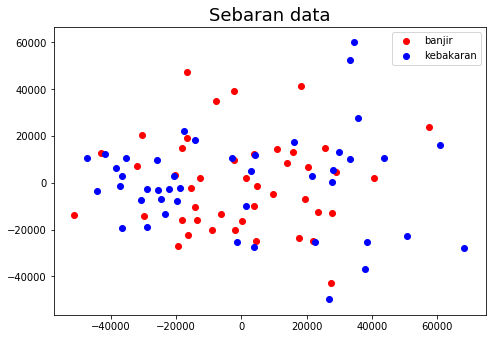

In [25]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
color = ['r', 'b']
i = 0
for images in X_TSNE:
    ax.scatter(X_TSNE[images][0], X_TSNE[images][1], color=color[i])
    i += 1
ax.legend(class_dir_list)
ax.set_title('Sebaran data', fontsize = 18)
plt.show()

## c. Melakukan data augmentasi untuk masing-masing kategori gambar.

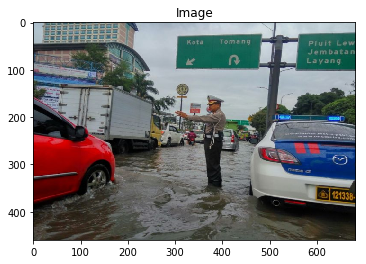

In [26]:
def scale_image(image):
    persen_width = random.randint(0, 25)/100
    persen_height = random.randint(0, 25)/100
    shape = image.shape
    dimension = (int(shape[1]*(1-persen_width)), int(shape[0]*(1-persen_height)))
    return cv.resize(image, dimension)

show_image(scale_image(images_data['banjir'][1]))

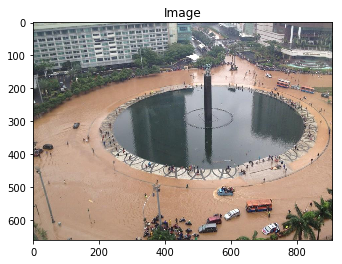

In [27]:
def crop_image(image):
    left = random.randint(0, 150)
    top = random.randint(0, 100)
    right = random.randint(0, 100)
    buttom = random.randint(0, 150)
    shape = image.shape

    return image[left:(shape[0]-right), top:(shape[1]-buttom)]

show_image(crop_image(images_data['banjir'][5]))

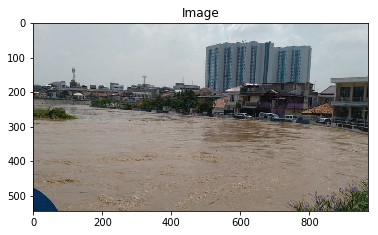

In [28]:
def flip_image(image):
    rand = random.randint(-1, 1)
    return cv.flip(image, rand)

show_image(flip_image(images_data['banjir'][6]))

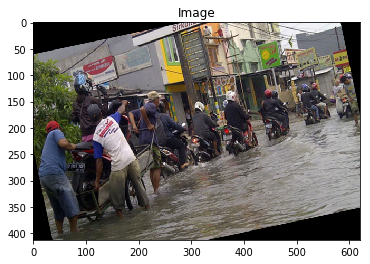

In [29]:
def rotate_image(image):
    degree = random.randint(-30, 30)
    shape = image.shape
    M = cv.getRotationMatrix2D(((shape[1]-1)/2.0,(shape[0]-1)/2.0), degree, 1)
    return cv.warpAffine(image, M, (shape[1],shape[0]))

show_image(rotate_image(images_data['banjir'][12]))

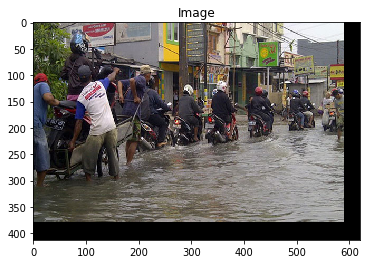

In [30]:
def translate_image(image):
    x = random.randint(-40, 40)
    y = random.randint(-40, 40)
    shape = image.shape
    M = np.float32([[1,0,x],[0,1,y]])
    return cv.warpAffine(image, M, (shape[1],shape[0]))

show_image(translate_image(images_data['banjir'][12]))

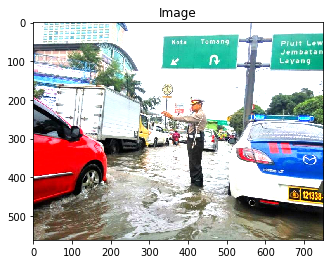

In [31]:
from PIL import ImageEnhance
from PIL import Image as im

def brightness_image(image):
    img = im.fromarray(image)
    enh_bri = ImageEnhance.Brightness(img)
    brightness = 1 + random.random()
    img_brightened = np.array(enh_bri.enhance(brightness))
    return img_brightened

show_image(brightness_image(images_data['banjir'][1]))

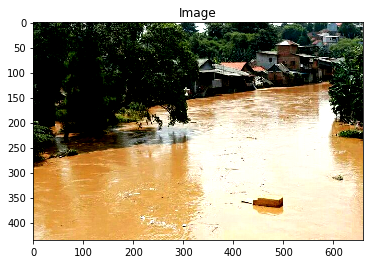

In [32]:
def contrast_image(image):
    img = im.fromarray(image)
    enh_con = ImageEnhance.Contrast(img)
    contrast = 1 + random.random()
    img_contrast = np.array(enh_con.enhance(contrast))
    return img_contrast

show_image(contrast_image(images_data['banjir'][13]))

In [33]:
augmentasi_list_function = [scale_image, crop_image, flip_image, rotate_image, 
                            translate_image, brightness_image, contrast_image]

def get_transform(image):
    rand = random.randint(0, 6)
    return augmentasi_list_function[rand](image)

In [34]:
def augmentasi(n = 200):
    for images in images_data:
        count = len(images_data[images])
        total = n - count

        a = 0
        for i in range(total):
            if a >= count:
                a -= count
            image_transform = get_transform(images_data[images][a])
            images_data[images].append(image_transform)

            a += 1

#### - jumlah gambar sebelum augmentasi

In [35]:
count_images(images_data)

Jumlah gambar banjir sebanyak 44 gambar
Jumlah gambar kebakaran sebanyak 44 gambar


In [36]:
augmentasi()

#### - jumlah gambar sesudah augmentasi

In [37]:
count_images(images_data)

Jumlah gambar banjir sebanyak 200 gambar
Jumlah gambar kebakaran sebanyak 200 gambar


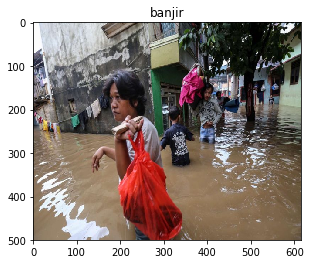

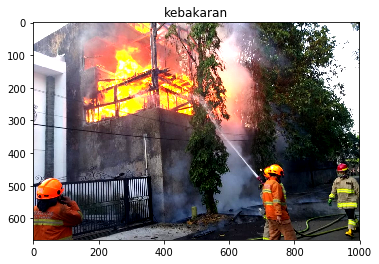

In [38]:
show_images(images_data, sample=True)

## d. Mengubah data menjadi Grayscale menggunakan Adaptive Tresholding. 

In [39]:
def tresholding(image, kind='original'):
    img = rgb2gray(image)
    if kind == 'original':
        return img
    elif kind == 'global':
        ret, img = cv.threshold(img,127,255,cv.THRESH_BINARY)
        return img
    elif kind == 'mean':
        return cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,11,2)
    elif kind == 'gaussian':
        return cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,11,2)
    else:
        return False
    
def adaptive_tresholding(data, kind = 'original'):

    if type(data) is dict:
        result = {}
        for key in data:
            result[key] = []
            for img in data[key]:
                img = tresholding(img, kind)
                result[key].append(img)

    elif type(data) is list:
        result = []
        for img in data:
            img = tresholding(img, kind)
            result.append(img)

    elif type(data) is np.ndarray:
        result = tresholding(data, kind)
    else:
        return False

    return result

In [40]:
images_data_fit = {
    'original' : adaptive_tresholding(images_data, 'original'),
    'global'   : adaptive_tresholding(images_data, 'global'),
    'mean'     : adaptive_tresholding(images_data, 'mean'),
    'gaussian' : adaptive_tresholding(images_data, 'gaussian')
}

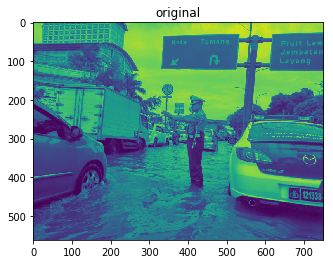

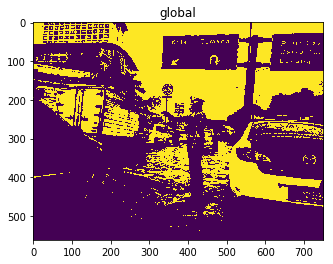

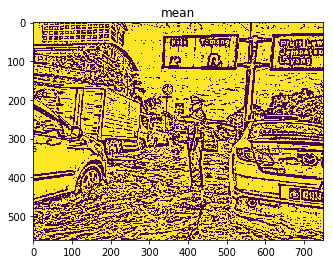

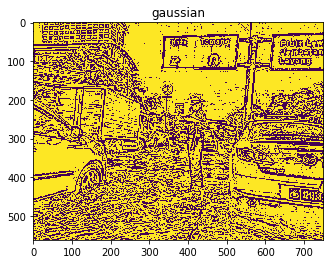

In [41]:
for kind in images_data_fit:
    show_image(images_data_fit[kind]['banjir'][1], image_name = kind)

## e. Melakukan metode Holdout, yaitu membagi data untuk masing-masing kategori menjadi 70% sebagai data latih dan 30 % sebagai data uji.

### - menggabungkan semua kategori dan merubah bentuk gambar ke 1xn

In [42]:
images_data_fit_1d = {}
for image in images_data_fit:
    images_data_fit_1d[image] = reshape_images_1d(images_data_fit[image], dimension = (500, 500))

In [43]:
images_data_fit_1d['original']

array([[249, 250, 251, ..., 134, 136, 137],
       [182, 181, 181, ...,  37,  32,  17],
       [  8,   9,  10, ...,  62,  62,  62],
       ...,
       [255, 255, 255, ..., 174, 178, 175],
       [ 98, 100, 102, ...,  80,  87,  82],
       [  0,   0,   0, ...,   2,   4,   6]], dtype=uint8)

### - membuat list target

In [44]:
target = []
class_num = 1
for key in images_data:
    count = len(images_data[key])
    for i in range(count):
        target.append(key)
    class_num += 1
target = np.array(target)
len(target)

400

In [45]:
target[176:225]

array(['banjir', 'banjir', 'banjir', 'banjir', 'banjir', 'banjir',
       'banjir', 'banjir', 'banjir', 'banjir', 'banjir', 'banjir',
       'banjir', 'banjir', 'banjir', 'banjir', 'banjir', 'banjir',
       'banjir', 'banjir', 'banjir', 'banjir', 'banjir', 'banjir',
       'kebakaran', 'kebakaran', 'kebakaran', 'kebakaran', 'kebakaran',
       'kebakaran', 'kebakaran', 'kebakaran', 'kebakaran', 'kebakaran',
       'kebakaran', 'kebakaran', 'kebakaran', 'kebakaran', 'kebakaran',
       'kebakaran', 'kebakaran', 'kebakaran', 'kebakaran', 'kebakaran',
       'kebakaran', 'kebakaran', 'kebakaran', 'kebakaran', 'kebakaran'],
      dtype='<U9')

### - melakukan metode holdout

In [46]:
images_data_holdout = {}

for kind in images_data_fit_1d:

    img_train, img_test, label_train, label_test = \
    train_test_split(images_data_fit_1d[kind], target, test_size= 0.3, random_state=42)

    images_data_holdout[kind] = {
        'img_train'  : img_train,
        'img_test'   : img_test,
        'label_train': label_train,
        'label_test' : label_test
    }

In [47]:
print(len(images_data_holdout['original']['img_train']), len(images_data_holdout['original']['img_test']))

280 120


## f. Melakukan fitting model dengan menggunakan algoritma Support Vector Classification. 

### - fitting model svm

In [48]:
svm_models = {}
for kind in images_data_holdout:
    img_train = images_data_holdout[kind]['img_train']
    label_train = images_data_holdout[kind]['label_train']
    svm_models[kind] = svm.SVC(probability=True, gamma='auto').fit(img_train, label_train)

In [49]:
for kind in images_data_holdout:
    predictions = svm_models[kind].predict(images_data_holdout[kind]['img_train'])
    label_predictions = images_data_holdout[kind]['label_train']
    print("Performance report data adaptive treshold %s model (train): \n %s \n" \
          %(kind, metrics.classification_report(label_predictions, predictions)))

    predictions = svm_models[kind].predict(images_data_holdout[kind]['img_test'])
    label_predictions = images_data_holdout[kind]['label_test']
    print("Performance report data adaptive treshold %s model (test): \n %s \n" \
          %(kind, metrics.classification_report(label_predictions, predictions)))

Performance report data adaptive treshold original model (train): 
               precision    recall  f1-score   support

      banjir       1.00      1.00      1.00       138
   kebakaran       1.00      1.00      1.00       142

   micro avg       1.00      1.00      1.00       280
   macro avg       1.00      1.00      1.00       280
weighted avg       1.00      1.00      1.00       280
 

Performance report data adaptive treshold original model (test): 
               precision    recall  f1-score   support

      banjir       1.00      0.10      0.18        62
   kebakaran       0.51      1.00      0.67        58

   micro avg       0.53      0.53      0.53       120
   macro avg       0.75      0.55      0.43       120
weighted avg       0.76      0.53      0.42       120
 



KeyboardInterrupt: 

### - fitting model logistic

In [ ]:
logistic_models = {}
for kind in images_data_holdout:
    img_train = images_data_holdout[kind]['img_train']
    label_train = images_data_holdout[kind]['label_train']
    logistic_models[kind] = LogisticRegression(C=0.01, penalty='l2', tol = 0.01).fit(img_train, label_train)

In [ ]:
for kind in images_data_holdout:
    predictions = logistic_models[kind].predict(images_data_holdout[kind]['img_train'])
    label_predictions = images_data_holdout[kind]['label_train']
    print("Performance report data adaptive treshold %s model (train): \n %s \n" \
          %(kind, metrics.classification_report(label_predictions, predictions)))

    predictions = logistic_models[kind].predict(images_data_holdout[kind]['img_test'])
    label_predictions = images_data_holdout[kind]['label_test']
    print("Performance report data adaptive treshold %s model (test): \n %s \n" \
          %(kind, metrics.classification_report(label_predictions, predictions)))

### - fitting model mlp

In [ ]:
mlp_models = {}
for kind in images_data_holdout:
    img_train = images_data_holdout[kind]['img_train']
    label_train = images_data_holdout[kind]['label_train']
    mlp_models[kind] = MLPClassifier(hidden_layer_sizes = (100), max_iter= 20, solver = 'sgd').fit(img_train, label_train)

In [ ]:
for kind in images_data_holdout:
    predictions = mlp_models[kind].predict(images_data_holdout[kind]['img_train'])
    label_predictions = images_data_holdout[kind]['label_train']
    print("Performance report data adaptive treshold %s model (train): \n %s \n" \
          %(kind, metrics.classification_report(label_predictions, predictions)))

    predictions = mlp_models[kind].predict(images_data_holdout[kind]['img_test'])
    label_predictions = images_data_holdout[kind]['label_test']
    print("Performance report data adaptive treshold %s model (test): \n %s \n" \
          %(kind, metrics.classification_report(label_predictions, predictions)))

### - menyimpan model

In [51]:
import pickle

In [52]:
model_dir = 'model/'

In [55]:
for kind in svm_models:
    filename = model_dir + 'svm_model_' + kind + '.sav'
    pickle.dump(svm_models[kind], open(filename, 'wb'))

In [ ]:
for kind in logistic_models:
    filename = model_dir + 'logistic_model_' + kind + '.sav'
    pickle.dump(logistic_models[kind], open(filename, 'wb'))

In [ ]:
for kind in mlp_models:
    filename = model_dir + 'mlp_model_' + kind + '.sav'
    pickle.dump(mlp_models[kind], open(filename, 'wb'))

### - load model

In [58]:
svm_model_original = pickle.load(open(model_dir + 'svm_model_original.sav', 'rb'))

In [95]:
# count = len(["ok" for idx, label in enumerate(test_labels) if label == predicts[idx]])
ypred = svm_models['original'].predict(images_predict[1].reshape(1,-1))
yprob = svm_models['original'].predict_proba(images_predict[1].reshape(1,-1))
# acc = accuracy_score(y_true=images_data_holdout['original']['label_test'], y_pred=ypred)
# print('Acc: {:.4f}'.format(acc))
print(ypred, yprob)
result_dic = {'file': 'gambar1', 'result': {'kebakaran': 0.90,   'banjir': 0.10},  'class': 'kebakaran'}

['kebakaran'] [[0.50863039 0.49136961]]


In [159]:
def get_image(path):
    image = bgr2rgb(cv.imread(path))
    image_name = path.split('/')[-1]
    return {'file_name': image_name, 'image' : image}

def predict_model(model, image):
    image_1d = reshape_images_1d(adaptive_tresholding(image['image'], 'original'), dimension = (500,500)).reshape(1,-1)
    prediction = model.predict(image_1d)
    probability = model.predict_proba(image_1d).reshape(-1)

    result = {}
    for class_name, prob in zip(class_dir_list, probability.tolist()):
        result[class_name] = prob

    return {'file': image['file_name'], 'result': result,  'class': prediction[0]}

banjir55.jpeg


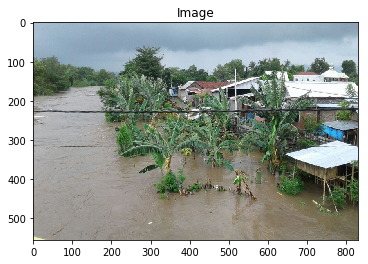

In [160]:
image = get_image(predict_dir + '/banjir55.jpeg')
print(image['file_name'])
show_image(image['image'])

In [162]:
predict_model(svm_models['original'], image)

{'file': 'banjir55.jpeg',
 'result': {'banjir': 0.5086303919560525, 'kebakaran': 0.4913696080439475},
 'class': 'kebakaran'}

kebakaran49.jpeg


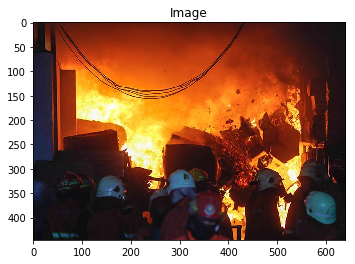

In [163]:
image = get_image(predict_dir + '/kebakaran49.jpeg')
print(image['file_name'])
show_image(image['image'])

In [164]:
predict_model(svm_models['original'], image)

{'file': 'kebakaran49.jpeg',
 'result': {'banjir': 0.5086303919560525, 'kebakaran': 0.4913696080439475},
 'class': 'kebakaran'}

## k. Menjelaskan perbedaan penggunaan metode GET dan POST dalam membuat API. 